## Contents
### 1. Import libraries and data
### 2. Elbow technique
### 3. K-means clustering

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/jonathanfava/King County Housing Sales'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Raw Data', 'kc_house_data.csv'))

### 2. Elbow technique

In [5]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [6]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-1.788312954192665e+23,
 -3.609376387339218e+22,
 -1.774306127541264e+22,
 -9.890700636494496e+21,
 -6.523148120057078e+21,
 -3.919853869816832e+21,
 -2.972919069518027e+21,
 -2.2251118317004e+21,
 -1.7735914836799332e+21]

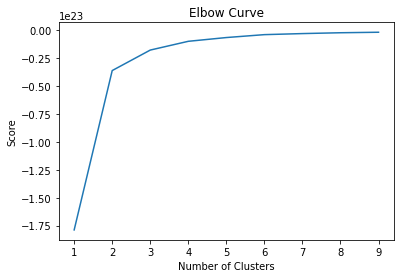

In [7]:
# create elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There is a sharp curve up to 2 then tapering off after 3, so will use 3 clusters for my model.

### 3. K-means clustering

In [8]:

# create the k-means object

kmeans = KMeans(n_clusters = 3) 

In [9]:
# fit k-means object to the data

kmeans.fit(df)

KMeans(n_clusters=3)

In [10]:
df['clusters'] = kmeans.fit_predict(df)

In [11]:
df.head()

,id,date,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,7129300520,20141013,2014,10,221900,3,1.00,1180,5650,1.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209,2014,12,538000,3,2.25,2570,7242,2.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,5631500400,20150225,2015,2,180000,2,1.00,770,10000,1.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,20141209,2014,12,604000,4,3.00,1960,5000,1.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218,2015,2,510000,3,2.00,1680,8080,1.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [12]:
df['clusters'].value_counts()

0    7777
1    7011
2    6825
Name: clusters, dtype: int64

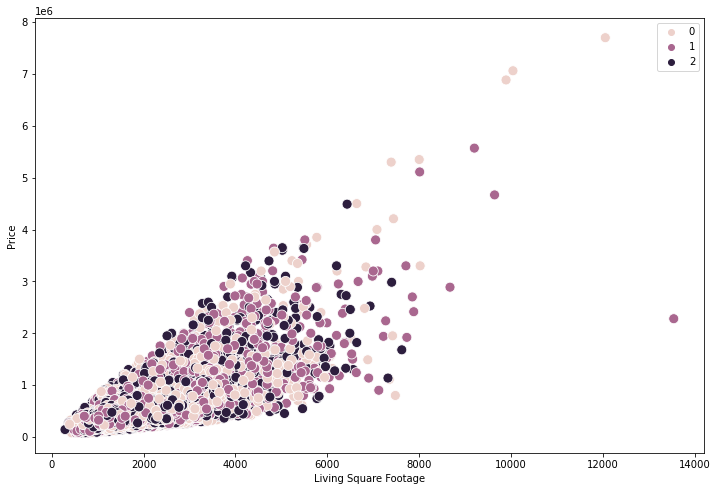

In [13]:
# plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Square Footage') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### The clustering for these two varibales does not appear to have any clear pattern.

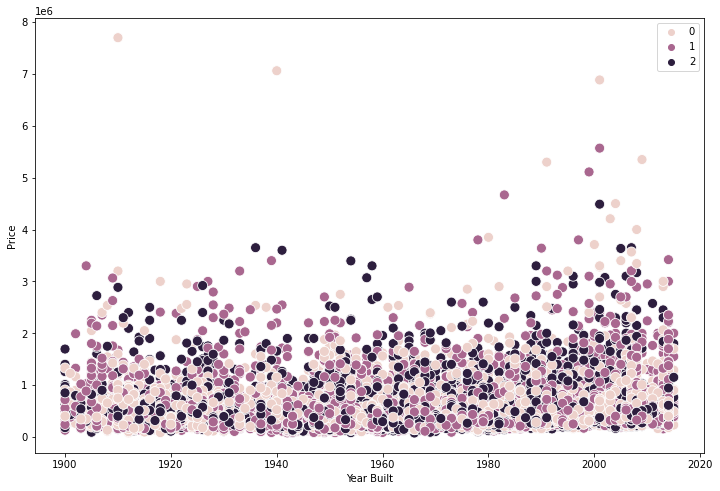

In [14]:
# plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yr_built'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Similarly to the previous plot the clsutering does not seem to have a clear pattern.

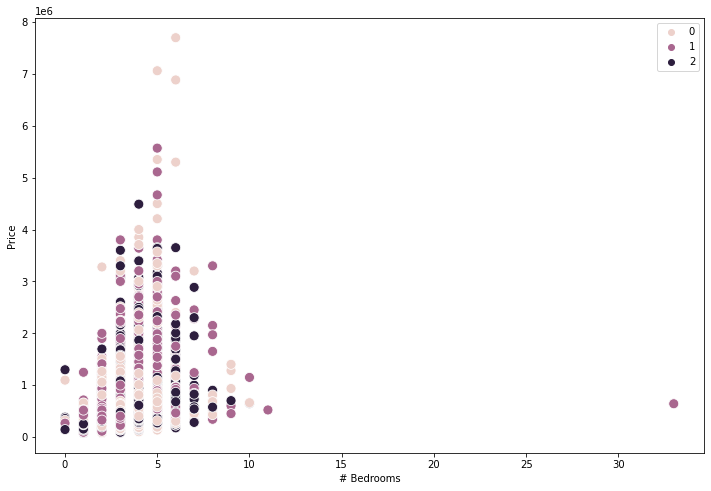

In [15]:
# plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bedrooms'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('# Bedrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

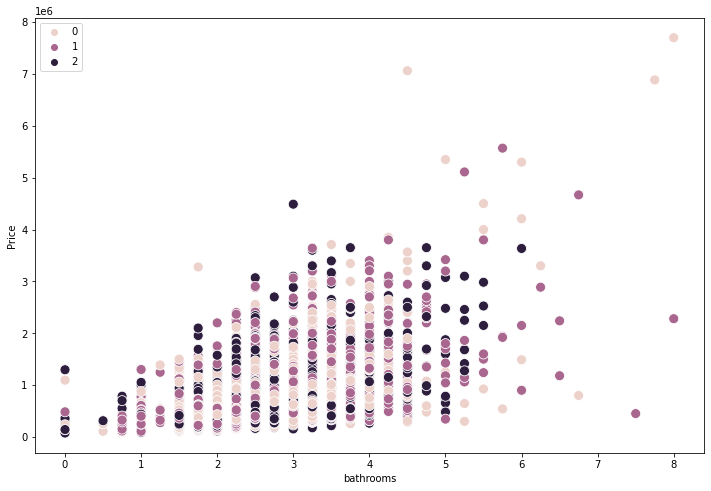

In [16]:
# plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### In comparing number of bathrooms and bedrooms to price the clustering doesn't appear to have any clear pattern as well. Based on the results of all of these plots further exploration of the data will be necessary.

In [17]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [18]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'sqft_living':['mean', 'median'], 
                         'bedrooms':['mean', 'median'],
                          'bathrooms':['mean', 'median']})

price            sqft_living          bedrooms         \
                      mean    median         mean  median      mean median   
cluster                                                                      
dark purple  539545.755311  450000.0  2064.362344  1900.0  3.366886    3.0   
pink         528983.981098  455000.0  2058.919763  1910.0  3.360422    3.0   
purple       552933.505491  449000.0  2118.297105  1940.0  3.386250    3.0   

            bathrooms         
                 mean median  
cluster                       
dark purple  2.100586   2.25  
pink         2.116722   2.25  
purple       2.126373   2.25

### These results can be very useful going foward in that it uncovered that many of the properties are very similar. Due to this it is clear that there are other factors weighing in on differentiating price from one another.

In [20]:
df.to_csv(os.path.join(path, '02 Data', 'Clean Data', 'KC_cluster.csv'))